In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
import networkx as nx


In [ ]:
i

3

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path='/content/gdrive/MyDrive/DS'

[Errno 2] No such file or directory: 'content'
/root


In [ ]:
#The FMA dataset has been used 
#genres_in contains information on the genres 
#tracks contains metadata on the various tracks
genres_in=pd.read_csv('/content/gdrive/MyDrive/DS/genres.csv')

In [ ]:
genres_in

,genre_id,#tracks,parent,title,top_level
0,1,8693,38,Avant-Garde,38
1,2,5271,0,International,2
2,3,1752,0,Blues,3
3,4,4126,0,Jazz,4
4,5,4106,0,Classical,5
...,...,...,...,...,...
158,1032,60,102,Turkish,2
159,1060,30,46,Tango,2
160,1156,26,130,Fado,2
161,1193,72,763,Christmas,38


In [ ]:
tracks=pd.read_excel('/content/gdrive/MyDrive/DS/Book3_1.xlsx')

In [ ]:
tracks.columns

Index(['track_id', 'album comments', 'album date_created',
       'album date_released', 'album engineer', 'album favorites', 'album id',
       'album information', 'album listens', 'album producer', 'album tags',
       'album title', 'album tracks', 'album type', 'artist active_year_begin',
       'artist active_year_end', 'artist associated_labels', 'artist bio',
       'artist comments', 'artist date_created', 'artist favorites',
       'artist id', 'artist latitude', 'artist location', 'artist longitude',
       'artist members', 'artist name', 'artist related_projects',
       'artist tags', 'artist website', 'artist wikipedia_page', 'set split',
       'set subset', 'track bit_rate', 'track comments', 'track composer',
       'track date_created', 'track date_recorded', 'track duration',
       'track favorites', 'track genre_top', 'track genres',
       'track genres_all', 'track information', 'track interest',
       'track language_code', 'track license', 'track listens',
  

In [ ]:
print('{} tracks, {} artists, {} albums, {} genres'.format(
    len(tracks), len(tracks['artist id'].unique()),
    len(tracks['album id'].unique()),
    sum(genres_in['#tracks'] > 0)))

106574 tracks, 16341 artists, 14854 albums, 161 genres


In [ ]:
tracks.drop([' .1',' '],axis=1,inplace=True)

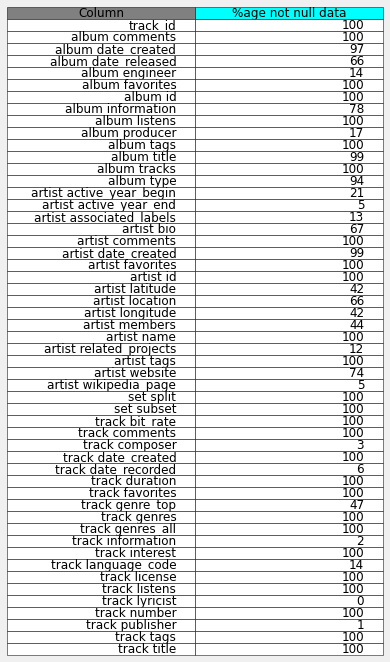

In [ ]:
#Information on the completeness of the dataset 
#% age of not null data in each column has been printed out 
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots()
L=tracks.shape[0]
ax.axis('off')

table_col=[]
for column in tracks.columns:
    null_percentage=sum(tracks[column].notnull())/L *100
    table_col.append([column,round(null_percentage)])
    
ax.table(cellText=table_col,loc='center',   colLabels=['Column','%age not null data'],fontsize=10,   colColours=['grey','cyan'])
    

Text(0.5, 1.0, 'Distribution of Track listens')

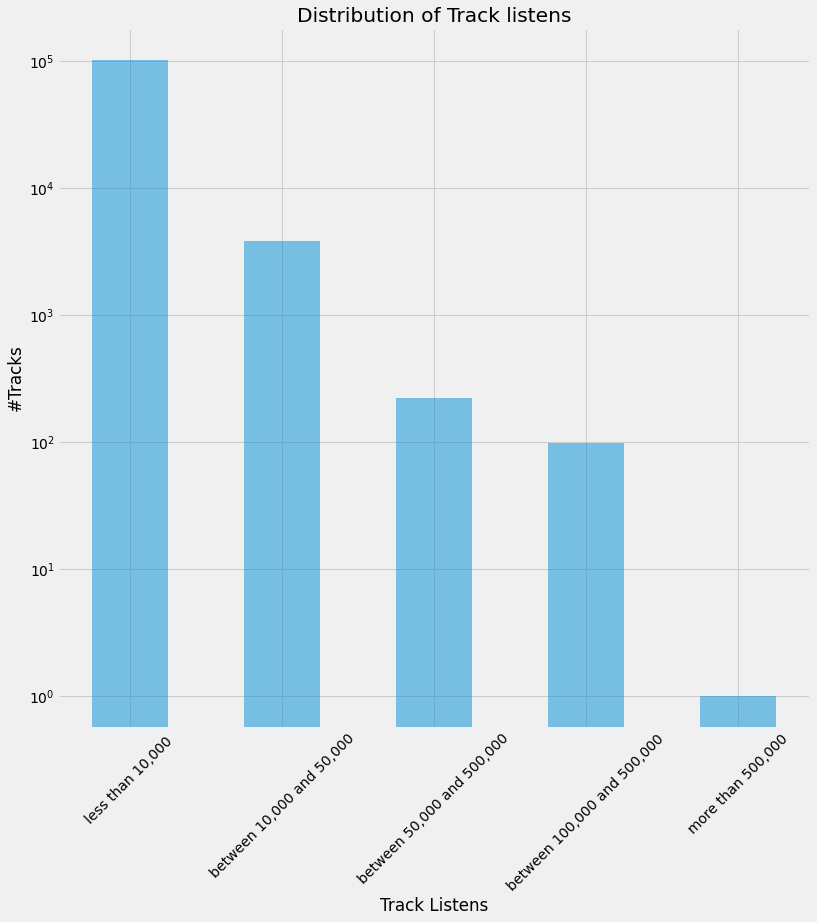

In [ ]:
def categorize(x):
    if(x<10000):
        return "less than 10,000 "
    elif(x>10000 and x<50000):
        return "between 10,000 and 50,000"
    elif(x>50000 and x<100000):
        return "between 50,000 and 500,000"
    elif(x>100000 and x<500000):
        return "between 100,000 and 500,000"
    else:
        return "more than 500,000"
plt.figure(figsize=(12,12))
plt.yscale('log')
tracks['track l_cat']=tracks["track listens"].apply(categorize)
plt.bar(x=tracks['track l_cat'].value_counts().index,height=tracks['track l_cat'].value_counts().values,width=0.5,alpha=0.5)
plt.xticks(rotation=45)
plt.xlabel("Track Listens")
plt.ylabel("#Tracks")
plt.title("Distribution of Track listens")

Text(0.5, 1.05, '#Tracks vs Track Listens by Top-Level Genre')

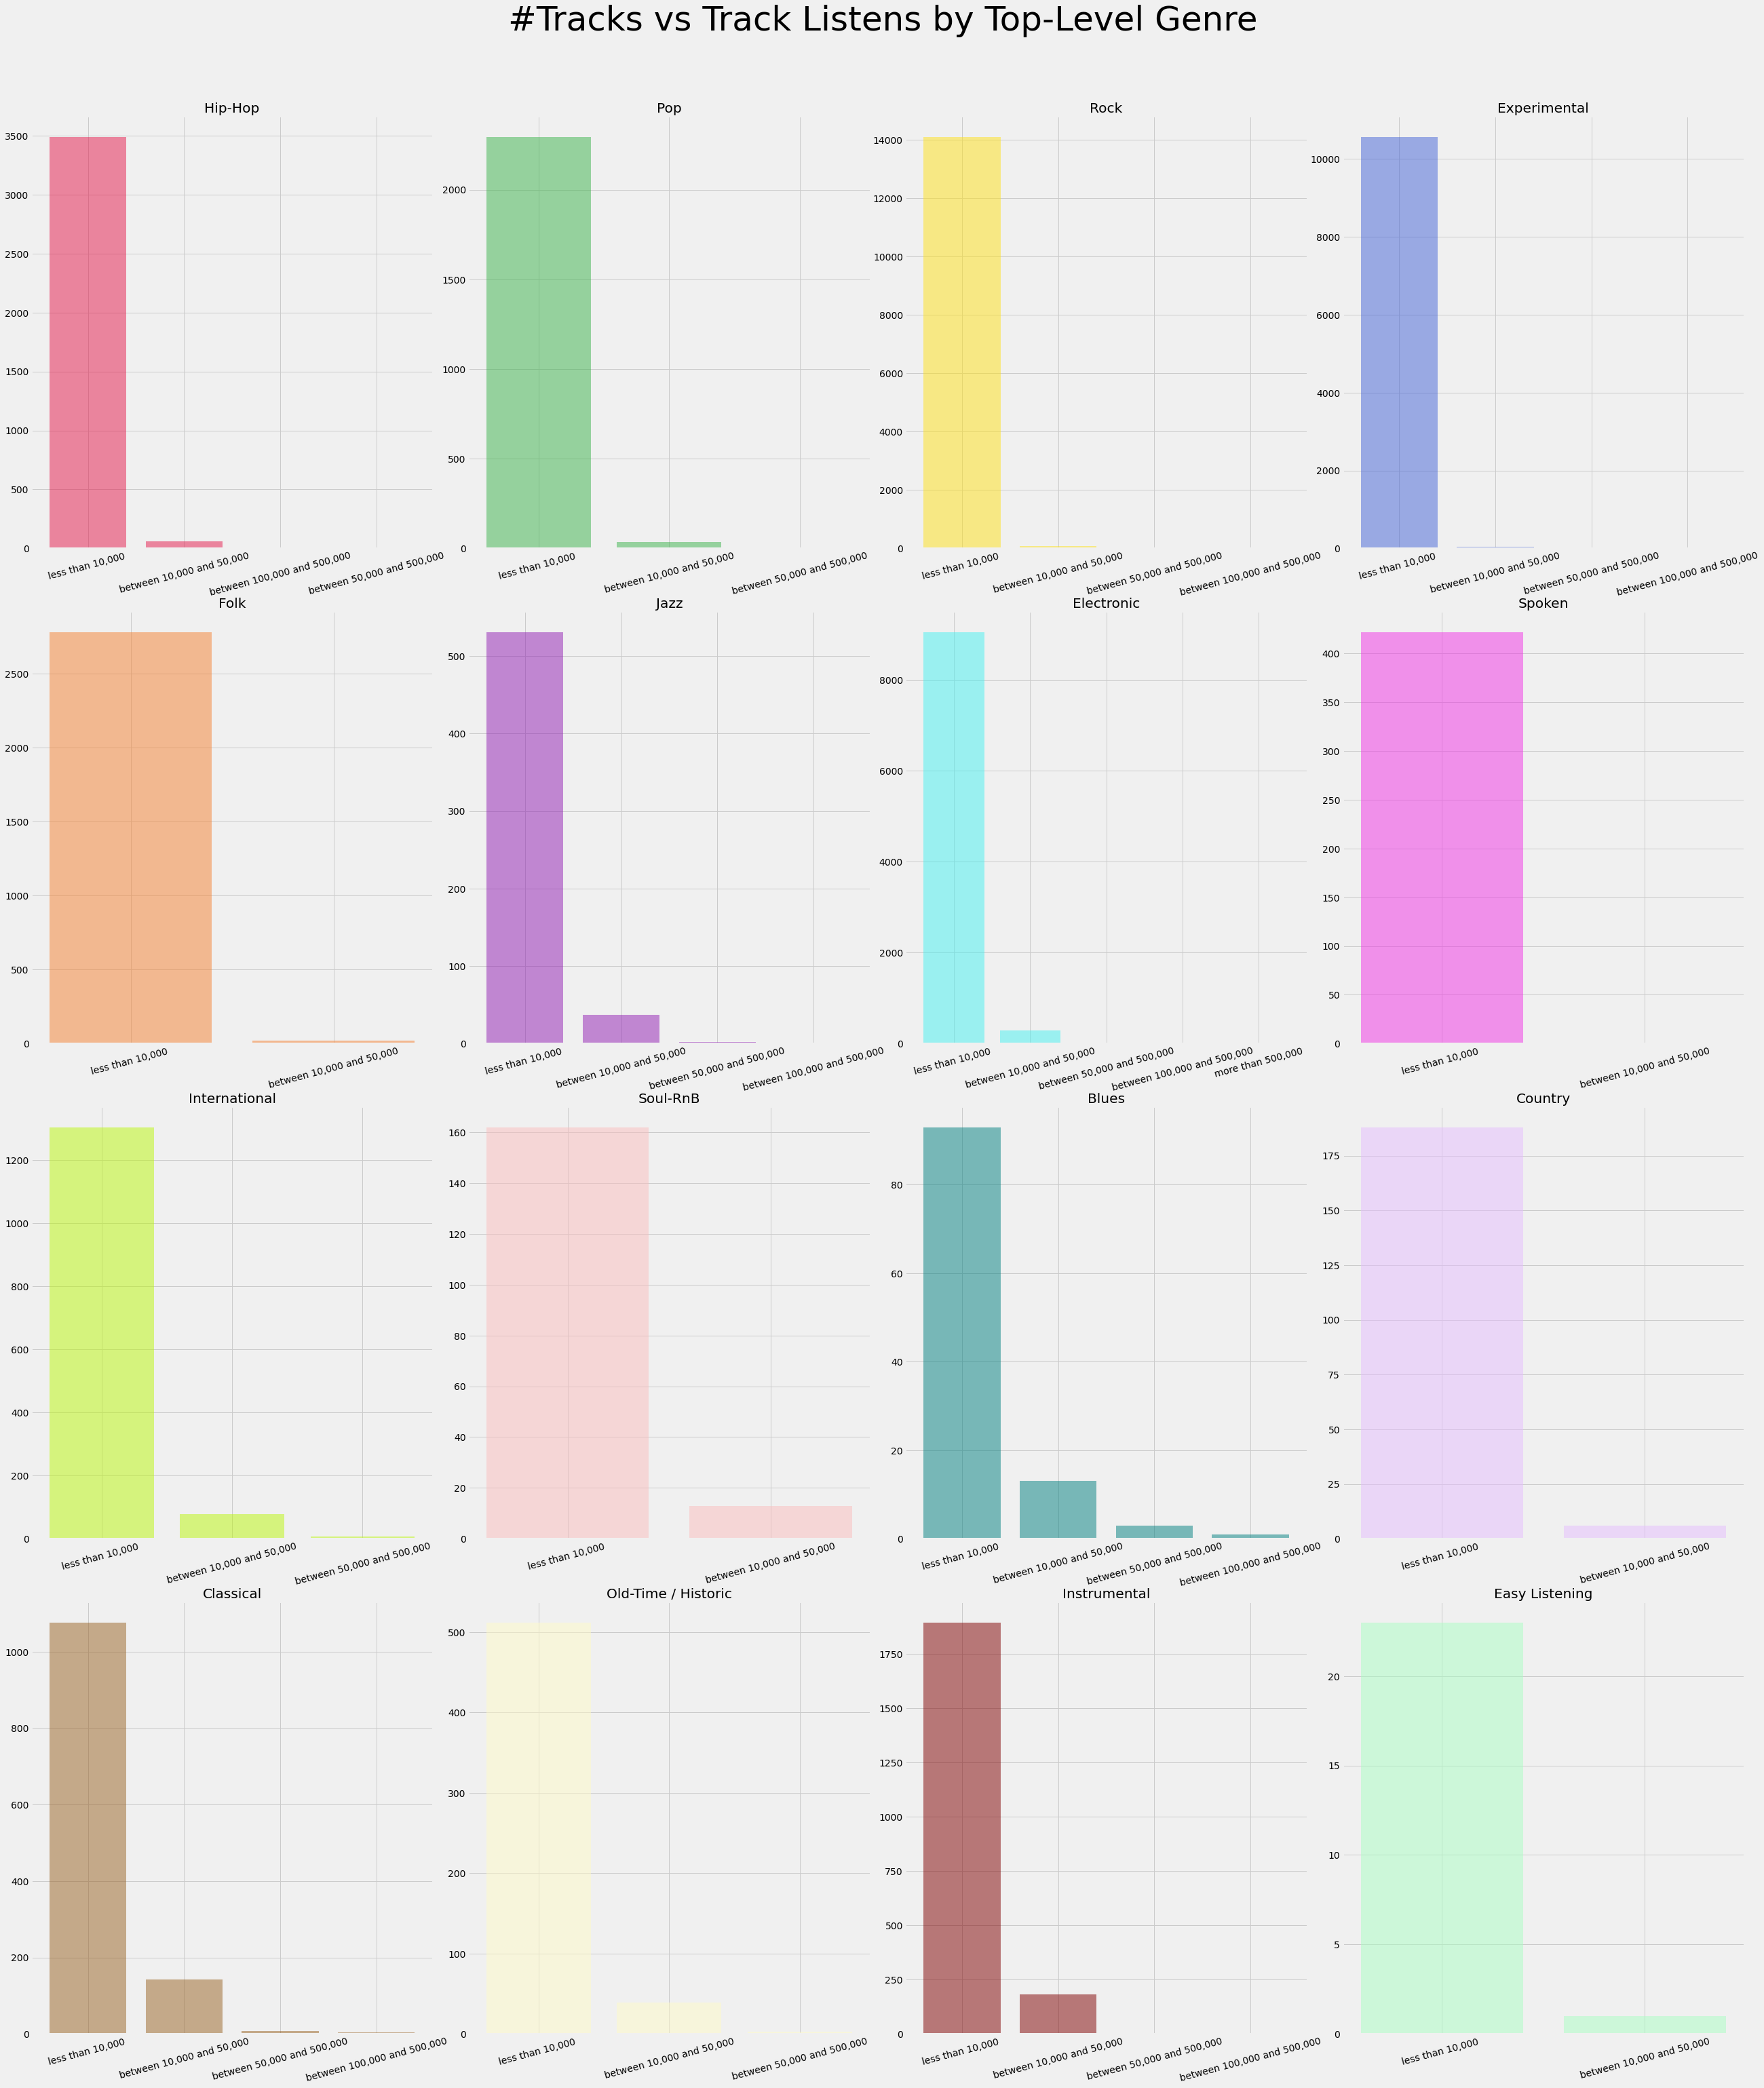

In [ ]:
colors=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
    
tracks.fillna(-1,inplace=True)
genres=tracks['track genre_top'].unique()
f_genres=[]
for g in genres:
    if(g!=-1):
        f_genres.append(g)
fig,ax=plt.subplots(4,4,figsize=(36,40))
fig.tight_layout(h_pad=5)
for k,gen in enumerate(f_genres):
    i=k//4
    j=k%4
    
    x_ax=tracks['track l_cat'][tracks['track genre_top']==gen].value_counts().index
    y_ax=tracks['track l_cat'][tracks['track genre_top']==gen].value_counts().values
    ax[i,j].bar(x_ax,y_ax,alpha=0.5,color=colors[k])
    ax[i,j].set_title(gen)
    ax[i,j].tick_params('x', labelrotation=15)

fig.suptitle("#Tracks vs Track Listens by Top-Level Genre",fontsize=50,x=0.5,y=1.05)
    



Text(0.5, 1.0, '#Listens by genre')

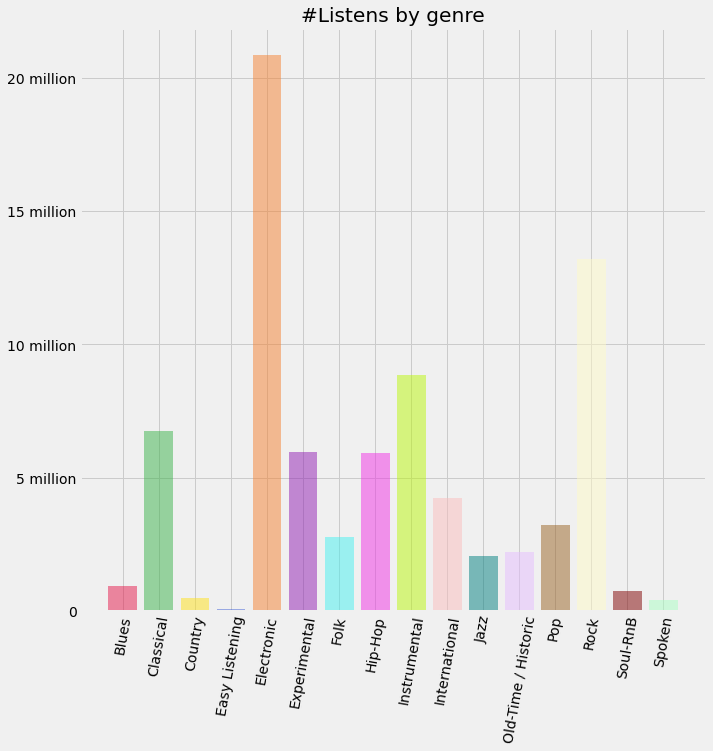

In [ ]:
tracks.groupby('track genre_top')['track listens'].sum()[1:]
x_ax=tracks.groupby('track genre_top')['track listens'].sum()[1:].index
y_ax=tracks.groupby('track genre_top')['track listens'].sum()[1:].values
plt.figure(figsize=(10,10))
plt.bar(x_ax,y_ax,alpha=0.5,color=colors[:16])
plt.xticks(rotation=80)
plt.yticks(np.linspace(0,2*10**7,5),['0','5 million','10 million','15 million','20 million'])
plt.title("#Listens by genre")


Text(0.5, 1.0, '#tracks by Genre')

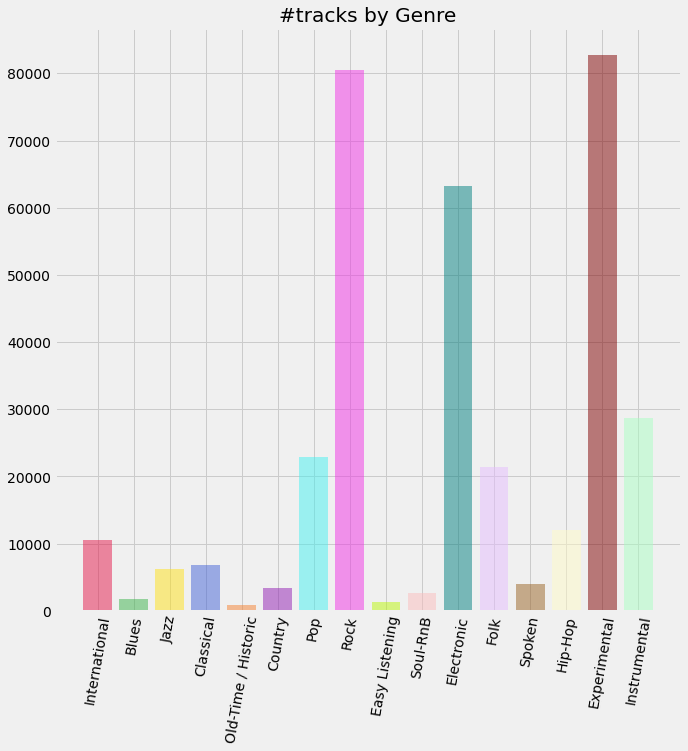

In [ ]:
tracksbygenre=genres_in.groupby(by='top_level')['#tracks'].sum()
names=[]
for i in tracksbygenre.index:
    name=genres_in['title'][genres_in['genre_id']==i]
    names.append(name.values[0])
plt.figure(figsize=(10,10))
plt.bar(names,tracksbygenre.values,alpha=0.5,color=colors[:16])
plt.xticks(rotation=80)
plt.title("#tracks by Genre")
    

In [ ]:
tracks['year']=tracks['album date_released'].apply(lambda x:str(x).split('-')[0])


Text(0, 0.5, '#Tracks')

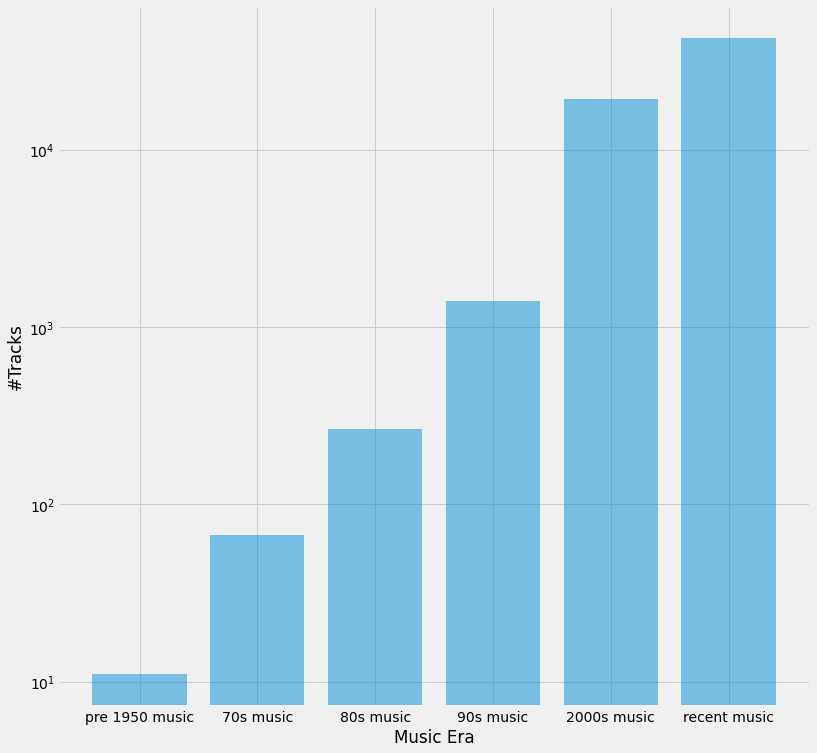

In [ ]:
plt.figure(figsize=(12,12))
def categorize_period(year):
    year=int(year)
    if(year<1950):
        return "pre 1950 music"
    elif(year<1960):
        return "50s music"
    elif(year<1970):
        return "70s music"
    elif(year<1980):
        return "70s music"
    elif(year<1990):
        return "80s music"
    elif(year<2000):
        return "90s music"
    elif(year<2010):
        return "2000s music"
    elif(year>2010):
        return "recent music"
    
x_ax=reversed(tracks['year'][tracks['year']!=''].apply(categorize_period).value_counts().index)
y_ax=reversed(tracks['year'][tracks['year']!=''].apply(categorize_period).value_counts().values)
plt.yscale('log')
plt.bar(list(x_ax),list(y_ax),alpha=0.5)
plt.xlabel("Music Era")
plt.ylabel("#Tracks")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0, 0.5, '#Artist')

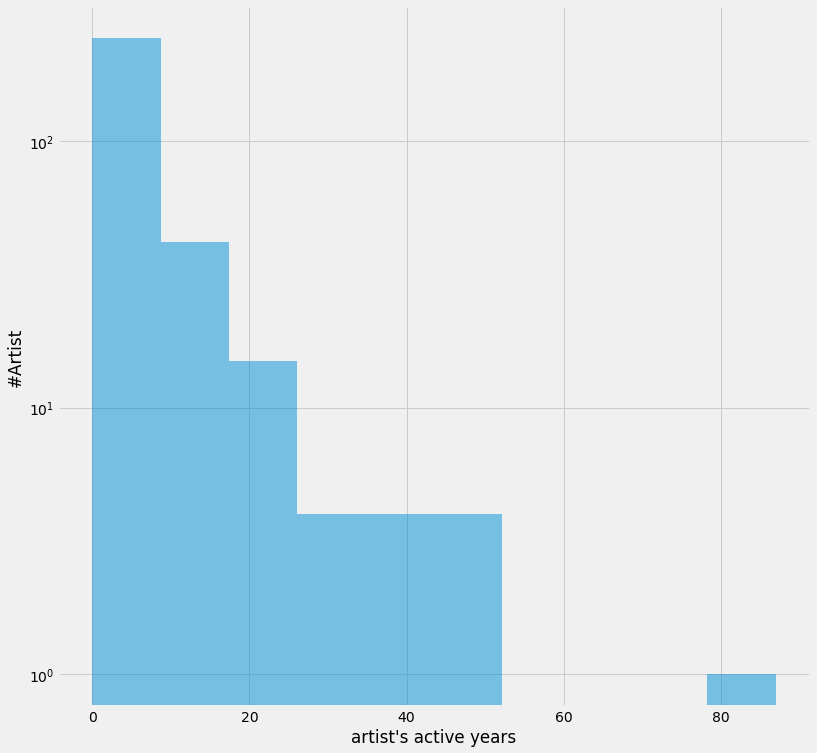

In [ ]:
tracks1=tracks.drop_duplicates(subset='artist id')
begin=tracks1['artist active_year_begin'][tracks1['artist active_year_begin']!=-1].apply(lambda x:int(str(x).split('-')[0]))
end=tracks1['artist active_year_end'][tracks1['artist active_year_end']!=-1].apply(lambda x:int(str(x).split('-')[0]))

tracks1['artist active for']=end-begin
plt.figure(figsize=(12,12))
plt.yscale('log')
plt.hist(tracks1['artist active for'],alpha=0.5)
plt.xlabel('artist\'s active years')
plt.ylabel('#Artist')


Text(8, 10000, 'The most frequent languages are -English,Spanish,French,\nPortuguese qnd German')

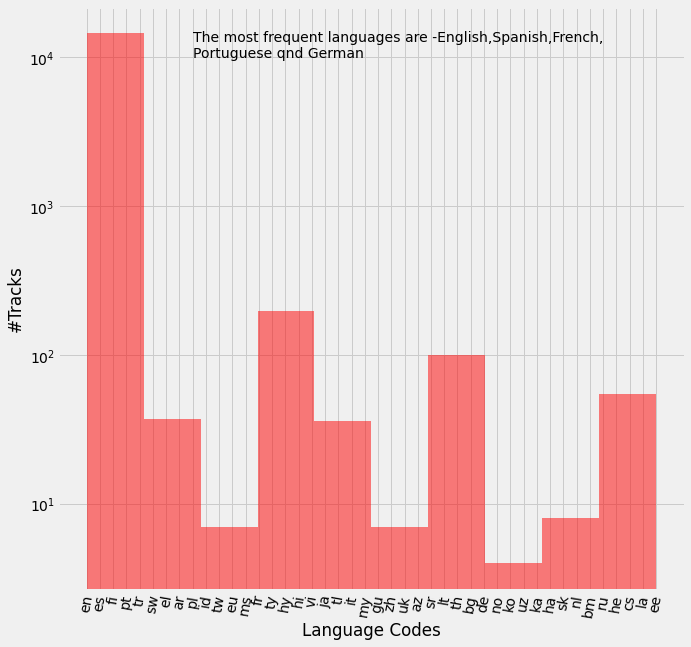

In [ ]:
plt.figure(figsize=(10,10))
plt.yscale('log')
plt.hist(tracks['track language_code'][tracks['track language_code']!=-1],alpha=0.5,color='r')
plt.xlabel('Language Codes')
plt.xticks(rotation=80)
plt.ylabel('#Tracks')
top_5=tracks['track language_code'][tracks['track language_code']!=-1].value_counts().index[:5]
text="The most common languages in this text are -{}".format(top_5)
plt.text(8,10**4,"The most frequent languages are -English,Spanish,French,\nPortuguese qnd German")

Text(10500, 10000, 'Average Duration(in s):278\nMinimum Duration(in s):0\nMaximum Duration(in s):18350')

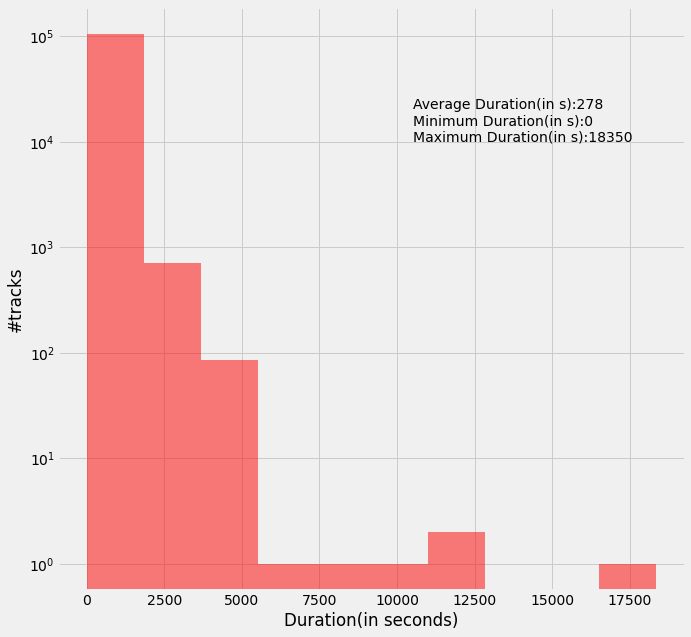

In [ ]:
plt.figure(figsize=(10,10))
plt.yscale('log')
plt.hist(tracks['track duration'][tracks['track duration']!=-1],alpha=0.5,color='r')
plt.xlabel('Duration(in seconds)')
plt.ylabel('#tracks')
mes="Average Duration(in s):{}\nMinimum Duration(in s):{}\nMaximum Duration(in s):{}".format(round(np.mean(tracks['track duration'][tracks['track duration']!=-1])),min(tracks['track duration'][tracks['track duration']!=-1]),max(tracks['track duration'][tracks['track duration']!=-1]))
plt.text(10500,10**4,mes)

In [ ]:
tracks['artist location'][tracks['artist location']!=-1].value_counts()

Brooklyn, NY                       2327
France                             1737
New York, NY                       1218
Chicago, IL                         783
Perm, Russia                        745
                                   ... 
Reykjavík / Berlin, Iceland           1
Pacific Northwest (USA)               1
Denton, Texas, U.S.                   1
Entre Tours et Poitiers, France       1
Knoxville TN                          1
Name: artist location, Length: 2329, dtype: int64

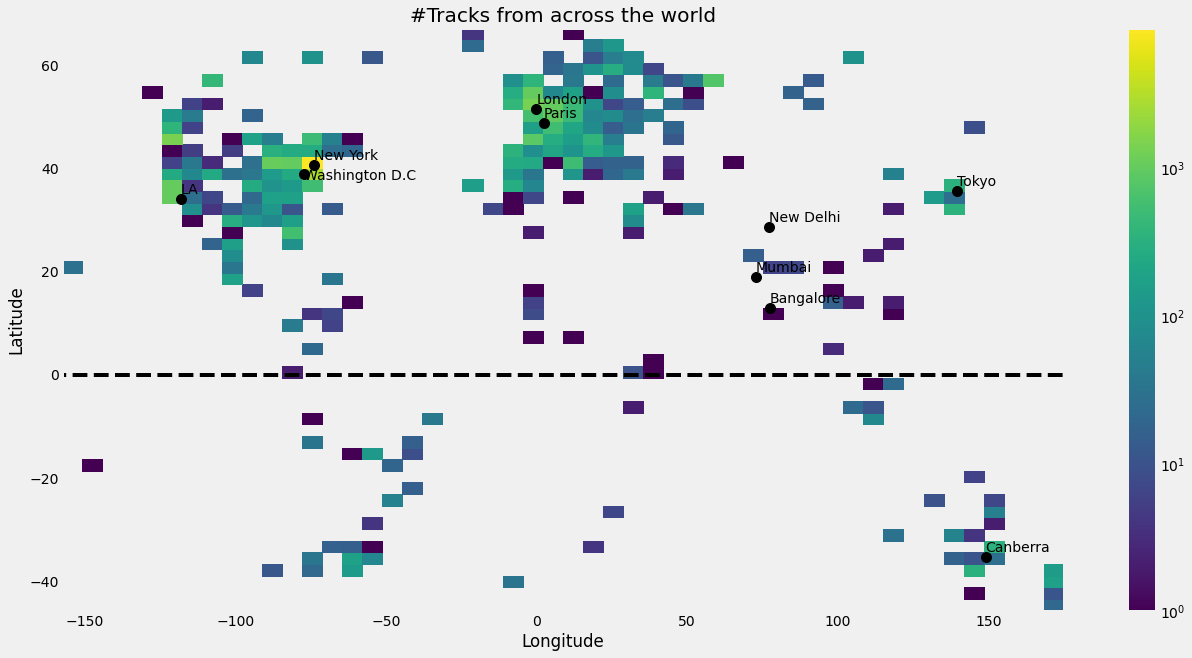

In [ ]:
longitude_data=tracks['artist longitude']!=-1
latitude_data=tracks['artist latitude']!=-1
subset=[longitude_data[i] and latitude_data[i] for  i in range(tracks.shape[0])]
plt.figure(figsize=(20,10))
plt.hist2d(tracks['artist longitude'][subset],tracks['artist latitude'][subset],norm=matplotlib.colors.LogNorm(),bins=50);
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()

##Some capital cities
#London
lon_x=0
lon_y=51.50853
plt.text(lon_x,lon_y+1,'London')
plt.plot(lon_x,lon_y,marker='o',markersize=10,color='black')

#Washington D.C Latitude:38.907045 Longitude:-77.036735 
DC_x=-77.03
DC_y=38.90
plt.text(DC_x,DC_y-1,'Washington D.C')
plt.plot(DC_x,DC_y,marker='o',markersize=10,color='black')


#New York  40.7648, -73.9808
NY_y=40.76
NY_x=-73.98
plt.text(NY_x,NY_y+1,'New York')
plt.plot(NY_x,NY_y,marker='o',markersize=10,color='black')
#LA Latitude:34.052239 Longitude:-118.243398 
LA_y=34.05
LA_x=-118
plt.text(LA_x,LA_y+1,'LA')
plt.plot(LA_x,LA_y,marker='o',markersize=10,color='black')
#New Delhi 28.65195, 77.23149

ND_y=28.65
ND_x=77.23
plt.text(ND_x,ND_y+1,'New Delhi')
plt.plot(ND_x,ND_y,marker='o',markersize=10,color='black')

#Mumbai 	19.07283  72.88261
Mum_y=19.07283 
Mum_x= 72.88261
plt.text(Mum_x,Mum_y+1,'Mumbai')
plt.plot(Mum_x,Mum_y,marker='o',markersize=10,color='black')
#Tokyo 	35.6895 139.69171
Tok_y=35.6895
Tok_x=139.69171
plt.text(Tok_x,Tok_y+1,'Tokyo')
plt.plot(Tok_x,Tok_y,marker='o',markersize=10,color='black')
#Canberra 	-35.28346 149.12807
Can_y= -35.28346
Can_x=149.12807
plt.text(Can_x,Can_y+1,'Canberra')
plt.plot(Can_x,Can_y,marker='o',markersize=10,color='black')

#Paris 	
paris_y=48.864716
paris_x=2.349014
plt.text(paris_x,paris_y+1,'Paris')
plt.plot(paris_x,paris_y,marker='o',markersize=10,color='black')

#Bangalore
bang_y=12.972442
bang_x= 77.580643
plt.text(bang_x,bang_y+1,'Bangalore')
plt.plot(bang_x,bang_y,marker='o',markersize=10,color='black')

plt.title("#Tracks from across the world")
plt.plot([-175,175],[0,0],color='black',ls='dashed')